In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

There are 10 csv files in the dataset, generating traffic data in four days of the week: tuesdays, wednesdays, thursdays and fridays. I am going to explore the dataset by each day of the week starting from tuesdays.

Tuesday data

In [12]:
df_tuesday = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-20-2018.csv')

In [13]:
df_tuesday.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign


In [14]:
df_tuesday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948748 entries, 0 to 7948747
Data columns (total 84 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow ID            object 
 1   Src IP             object 
 2   Src Port           int64  
 3   Dst IP             object 
 4   Dst Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow Duration      int64  
 8   Tot Fwd Pkts       int64  
 9   Tot Bwd Pkts       int64  
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min      

In [15]:
df_tuesday.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [27]:
df_tuesday["Label"].unique()

array(['Benign', 'DDoS attacks-LOIC-HTTP'], dtype=object)

In [19]:
df_tuesday.shape

(7948748, 84)

In [85]:
benign_tues = df_tuesday["Label"].value_counts()[['Benign']].sum()
print(benign_tues)

7372557


In [28]:
DDos_attacks_LOIC_HTTP = df_tuesday["Label"].value_counts()[['DDoS attacks-LOIC-HTTP']].sum()
print(DDos_attacks_LOIC_HTTP)

576191


In [86]:
# Class imbalance ratios
benign_to_ddos_ratio = benign_tues/DDos_attacks_LOIC_HTTP
print(benign_to_ddos_ratio)

12.795335227381198


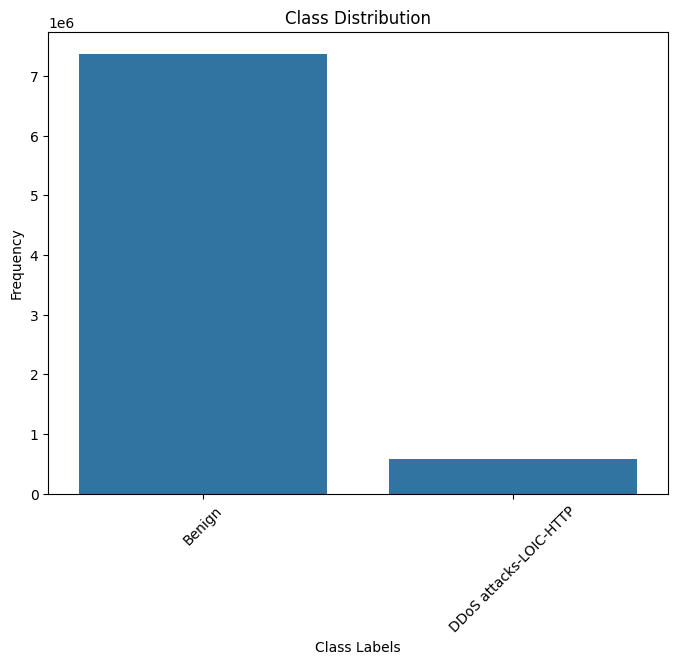

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_tuesday)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

Wednesday data

In [31]:
df_wednesday_1 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-14-2018.csv')

In [32]:
df_wednesday_1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [33]:
df_wednesday_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [34]:
df_wednesday_1.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [60]:
df_wednesday_1["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [36]:
df_wednesday_1.shape

(1048575, 80)

In [87]:
benign_wed_1 = df_wednesday_1["Label"].value_counts()[['Benign']].sum()
print(benign_wed_1)

667626


In [39]:
FTP_BruteForce = df_wednesday_1["Label"].value_counts()[['FTP-BruteForce']].sum()
print(FTP_BruteForce)
SSH_Bruteforce = df_wednesday_1["Label"].value_counts()[['SSH-Bruteforce']].sum()
print(SSH_Bruteforce)

193360
187589


In [90]:
# Class imbalance ratios
benign_to_FTP_ratio = benign_wed_1/FTP_BruteForce
print(benign_to_FTP_ratio)
benign_to_SSH_ratio = benign_wed_1/SSH_Bruteforce
print(benign_to_SSH_ratio)

3.4527616880430285
3.5589826695595157


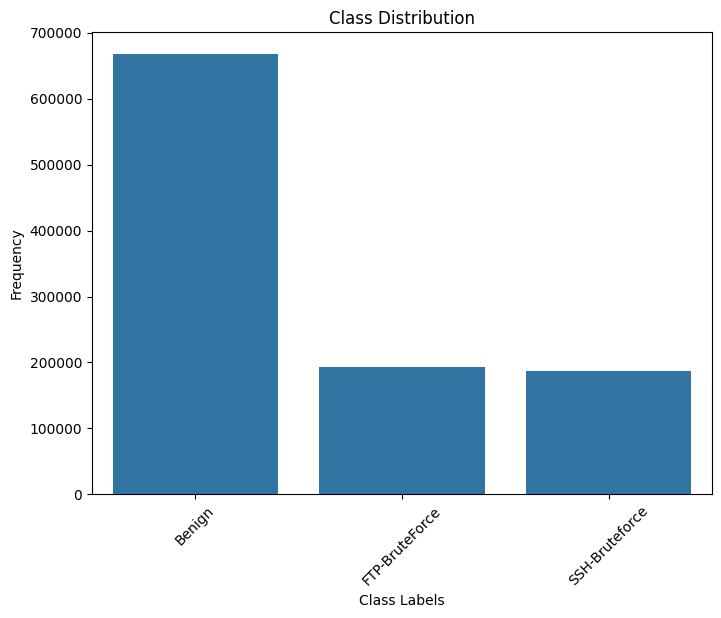

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_wednesday_1)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [41]:
df_wednesday_2 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-21-2018.csv')

In [42]:
df_wednesday_2.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,21/02/2018 08:33:25,37953,5,3,135,127,135,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
2,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
3,500,17,21/02/2018 08:33:11,99743998,5,0,2500,0,500,500,...,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,Benign
4,500,17,21/02/2018 08:33:11,99743999,5,0,2500,0,500,500,...,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,Benign


In [44]:
df_wednesday_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [45]:
df_wednesday_2.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [46]:
df_wednesday_2["Label"].unique()

array(['Benign', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'], dtype=object)

In [49]:
df_wednesday_2.shape

(1048575, 80)

In [91]:
benign_wed_2 = df_wednesday_2["Label"].value_counts()[['Benign']].sum()
print(benign_wed_2)

360833


In [51]:
LOIC = df_wednesday_2["Label"].value_counts()[['DDOS attack-LOIC-UDP']].sum()
print(LOIC)
HOIC = df_wednesday_2["Label"].value_counts()[['DDOS attack-HOIC']].sum()
print(HOIC)

1730
686012


In [92]:
# Class imbalance ratios
benign_to_LOIC_ratio = benign_wed_2/LOIC
print(benign_to_LOIC_ratio)
benign_to_HOIC_ratio = benign_wed_2/HOIC
print(benign_to_HOIC_ratio)

208.57398843930636
0.5259864258934246


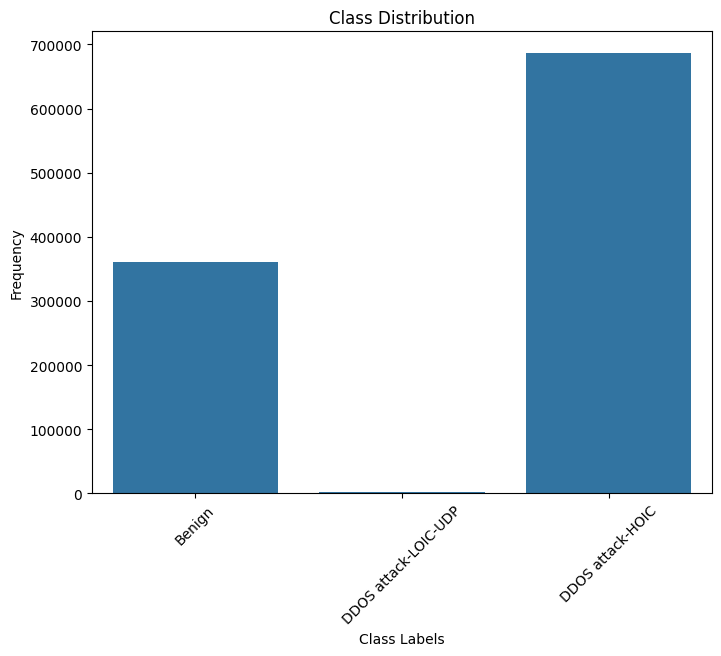

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_wednesday_2)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [72]:
df_wednesday_3 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-28-2018.csv')

/tmp/ipython-input-3067630154.py:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wednesday_3 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-28-2018.csv')


In [73]:
df_wednesday_3.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,28/02/2018 08:22:16,102429,6,7,708,3718,387,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,28/02/2018 08:22:16,167,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [74]:
df_wednesday_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613104 entries, 0 to 613103
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Dst Port           613104 non-null  object
 1   Protocol           613104 non-null  object
 2   Timestamp          613104 non-null  object
 3   Flow Duration      613104 non-null  object
 4   Tot Fwd Pkts       613104 non-null  object
 5   Tot Bwd Pkts       613104 non-null  object
 6   TotLen Fwd Pkts    613104 non-null  object
 7   TotLen Bwd Pkts    613104 non-null  object
 8   Fwd Pkt Len Max    613104 non-null  object
 9   Fwd Pkt Len Min    613104 non-null  object
 10  Fwd Pkt Len Mean   613104 non-null  object
 11  Fwd Pkt Len Std    613104 non-null  object
 12  Bwd Pkt Len Max    613104 non-null  object
 13  Bwd Pkt Len Min    613104 non-null  object
 14  Bwd Pkt Len Mean   613104 non-null  object
 15  Bwd Pkt Len Std    613104 non-null  object
 16  Flow Byts/s        6

In [75]:
df_wednesday_3.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [76]:
df_wednesday_3["Label"].unique()

array(['Benign', 'Label', 'Infilteration'], dtype=object)

In [77]:
df_wednesday_3 = df_wednesday_3.drop(df_wednesday_3[df_wednesday_3["Label"] == 'Label'].index)

In [78]:
df_wednesday_3["Label"].unique()

array(['Benign', 'Infilteration'], dtype=object)

In [79]:
df_wednesday_3.shape

(613071, 80)

In [93]:
benign_wed_3 = df_wednesday_3["Label"].value_counts()[['Benign']].sum()
print(benign_wed_3)

544200


In [80]:
Infilteration = df_wednesday_3["Label"].value_counts()[['Infilteration']].sum()
print(Infilteration)

68871


In [94]:
# Class imbalance ratios
benign_to_Infilteration_ratio = benign_wed_3/Infilteration
print(benign_to_Infilteration_ratio)

7.901729320033105


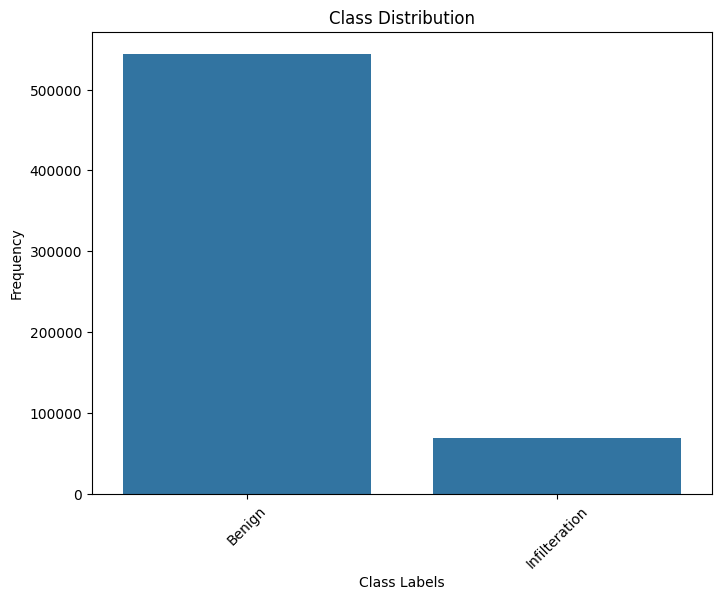

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_wednesday_3)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

Thursday Data

In [97]:
df_thursday_1 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-15-2018.csv')

In [98]:
df_thursday_1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [101]:
df_thursday_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [102]:
df_thursday_1.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [103]:
df_thursday_1["Label"].unique()

array(['Benign', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris'],
      dtype=object)

In [105]:
df_thursday_1.shape

(1048575, 80)

In [106]:
benign_thur_1 = df_thursday_1["Label"].value_counts()[['Benign']].sum()
print(benign_thur_1)

996077


In [107]:
goldeneye = df_thursday_1["Label"].value_counts()[['DoS attacks-GoldenEye']].sum()
print(goldeneye)
slowloris = df_thursday_1["Label"].value_counts()[['DoS attacks-Slowloris']].sum()
print(slowloris)

41508
10990


In [108]:
benign_to_goldeneye_ratio = benign_thur_1/goldeneye
print(benign_to_goldeneye_ratio)
benign_to_slowloris_ratio = benign_thur_1/slowloris
print(benign_to_slowloris_ratio)

23.997229449744626
90.63484986351229


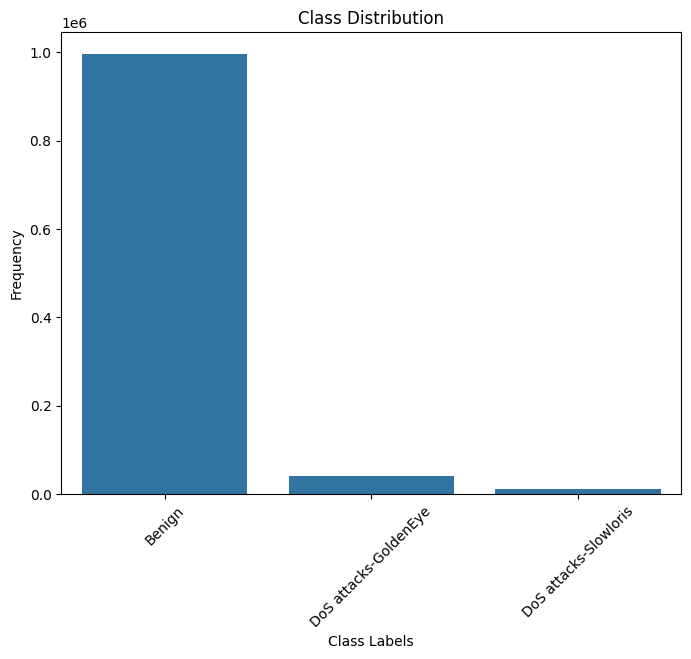

In [109]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_thursday_1)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [110]:
df_thursday_2 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-22-2018.csv')

In [111]:
df_thursday_2.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,22/02/2018 08:26:03,20553406,10,7,1063,1297,744,0,...,20,1027304.0,0.0,1027304,1027304,1.952608e+07,0.000000e+00,19526080,19526080,Benign
1,34989,6,22/02/2018 08:26:24,790,2,0,848,0,848,0,...,20,0.0,0.0,0,0,0.000000e+00,0.000000e+00,0,0,Benign
2,500,17,22/02/2018 08:25:10,99745913,5,0,2500,0,500,500,...,8,4000203.0,0.0,4000203,4000203,3.191524e+07,3.792787e+07,75584115,7200679,Benign
3,500,17,22/02/2018 08:25:10,99745913,5,0,2500,0,500,500,...,8,4000189.0,0.0,4000189,4000189,3.191524e+07,3.792788e+07,75584130,7200693,Benign
4,500,17,22/02/2018 08:24:59,89481361,6,0,3000,0,500,500,...,8,4000554.0,0.0,4000554,4000554,2.137020e+07,1.528109e+07,41990741,7200848,Benign


In [112]:
df_thursday_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [113]:
df_thursday_2.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [114]:
df_thursday_2["Label"].unique()

array(['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],
      dtype=object)

In [115]:
df_thursday_2.shape

(1048575, 80)

In [117]:
benign_thur_2 = df_thursday_2["Label"].value_counts()[['Benign']].sum()
print(benign_thur_2)

1048213


In [119]:
web = df_thursday_2["Label"].value_counts()[['Brute Force -Web']].sum()
print(web)
xss = df_thursday_2["Label"].value_counts()[['Brute Force -XSS']].sum()
print(xss)
sql = df_thursday_2["Label"].value_counts()[['SQL Injection']].sum()
print(sql)

249
79
34


In [120]:
benign_to_web_ratio = benign_thur_2/web
print(benign_to_web_ratio)
benign_to_xss_ratio = benign_thur_2/xss
print(benign_to_xss_ratio)
benign_to_sql_ratio = benign_thur_2/sql
print(benign_to_sql_ratio)

4209.690763052209
13268.518987341773
30829.79411764706


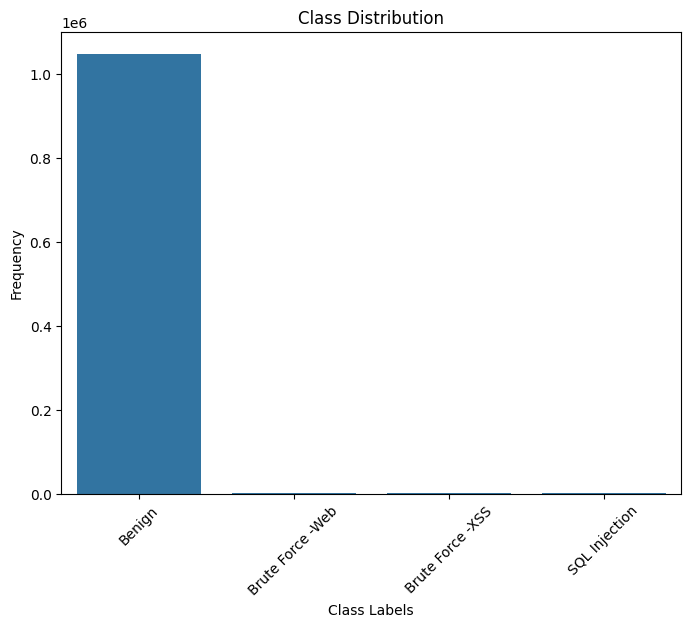

In [121]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_thursday_2)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [122]:
df_thursday_3 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/03-01-2018.csv')

/tmp/ipython-input-3885448632.py:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_thursday_3 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/03-01-2018.csv')


In [123]:
df_thursday_3.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909,0,999909,999909,61000000,0,61000000,61000000,Benign


In [124]:
df_thursday_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331125 entries, 0 to 331124
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Dst Port           331125 non-null  object
 1   Protocol           331125 non-null  object
 2   Timestamp          331125 non-null  object
 3   Flow Duration      331125 non-null  object
 4   Tot Fwd Pkts       331125 non-null  object
 5   Tot Bwd Pkts       331125 non-null  object
 6   TotLen Fwd Pkts    331125 non-null  object
 7   TotLen Bwd Pkts    331125 non-null  object
 8   Fwd Pkt Len Max    331125 non-null  object
 9   Fwd Pkt Len Min    331125 non-null  object
 10  Fwd Pkt Len Mean   331125 non-null  object
 11  Fwd Pkt Len Std    331125 non-null  object
 12  Bwd Pkt Len Max    331125 non-null  object
 13  Bwd Pkt Len Min    331125 non-null  object
 14  Bwd Pkt Len Mean   331125 non-null  object
 15  Bwd Pkt Len Std    331125 non-null  object
 16  Flow Byts/s        3

In [125]:
df_thursday_3.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [126]:
df_thursday_3["Label"].unique()

array(['Benign', 'Label', 'Infilteration'], dtype=object)

In [127]:
df_thursday_3 = df_thursday_3.drop(df_thursday_3[df_thursday_3["Label"] == 'Label'].index)

In [128]:
df_thursday_3["Label"].unique()

array(['Benign', 'Infilteration'], dtype=object)

In [131]:
df_thursday_3.shape

(331100, 80)

In [129]:
benign_thur_3 = df_thursday_3["Label"].value_counts()[['Benign']].sum()
print(benign_thur_3)

238037


In [130]:
Infilteration = df_thursday_3["Label"].value_counts()[['Infilteration']].sum()
print(Infilteration)

93063


In [132]:
benign_to_Infilteration_ratio = benign_thur_3/Infilteration
print(benign_to_Infilteration_ratio)

2.5578049278445785


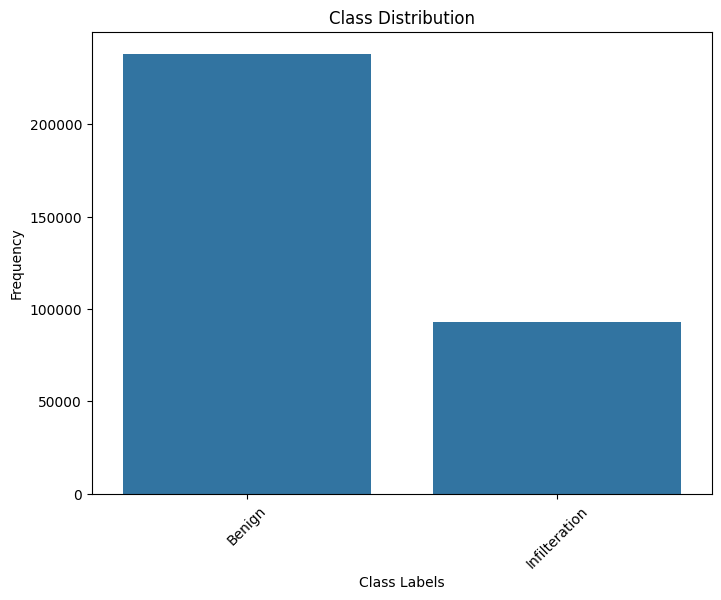

In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_thursday_3)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [134]:
df_friday_1 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-16-2018.csv')

/tmp/ipython-input-2082851023.py:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_friday_1 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-16-2018.csv')


In [135]:
df_friday_1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,138.592929,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,263.750829,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0.0,2624734,2624734,9058214.0,0.0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,82.024387,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0.0,0,0,0.0,0.0,0,0,Benign


In [136]:
df_friday_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Dst Port           1048575 non-null  object
 1   Protocol           1048575 non-null  object
 2   Timestamp          1048575 non-null  object
 3   Flow Duration      1048575 non-null  object
 4   Tot Fwd Pkts       1048575 non-null  object
 5   Tot Bwd Pkts       1048575 non-null  object
 6   TotLen Fwd Pkts    1048575 non-null  object
 7   TotLen Bwd Pkts    1048575 non-null  object
 8   Fwd Pkt Len Max    1048575 non-null  object
 9   Fwd Pkt Len Min    1048575 non-null  object
 10  Fwd Pkt Len Mean   1048575 non-null  object
 11  Fwd Pkt Len Std    1048575 non-null  object
 12  Bwd Pkt Len Max    1048575 non-null  object
 13  Bwd Pkt Len Min    1048575 non-null  object
 14  Bwd Pkt Len Mean   1048575 non-null  object
 15  Bwd Pkt Len Std    1048575 non-null  object
 16  

In [137]:
df_friday_1.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [138]:
df_friday_1["Label"].unique()

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk', 'Label'],
      dtype=object)

In [139]:
df_friday_1 = df_friday_1.drop(df_friday_1[df_friday_1["Label"] == 'Label'].index)

In [140]:
df_friday_1["Label"].unique()

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk'],
      dtype=object)

In [141]:
df_friday_1.shape

(1048574, 80)

In [142]:
benign_fri_1 = df_friday_1["Label"].value_counts()[['Benign']].sum()
print(benign_fri_1)

446772


In [145]:
SlowHTTPTest = df_friday_1["Label"].value_counts()[['DoS attacks-SlowHTTPTest']].sum()
print(SlowHTTPTest)
hulk = df_friday_1["Label"].value_counts()[['DoS attacks-Hulk']].sum()
print(hulk)


139890
461912


In [146]:
benign_to_SlowHTTPTest_ratio = benign_fri_1/SlowHTTPTest
print(benign_to_SlowHTTPTest_ratio)
benign_to_hulk_ratio = benign_fri_1/hulk
print(benign_to_hulk_ratio)

3.1937379369504613
0.9672231940282998


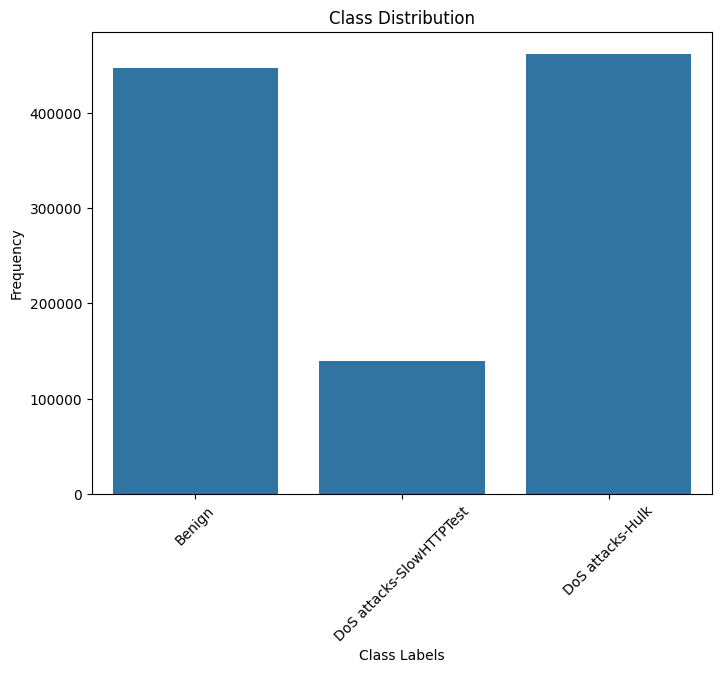

In [147]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_friday_1)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [148]:
df_friday_2 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/02-23-2018.csv')

In [149]:
df_friday_2.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,23/02/2018 08:18:29,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,23/02/2018 08:17:45,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,23/02/2018 08:17:45,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,23/02/2018 08:19:55,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,23/02/2018 08:18:17,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign


In [150]:
df_friday_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [151]:
df_friday_2.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [152]:
df_friday_2["Label"].unique()

array(['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],
      dtype=object)

In [153]:
df_friday_2.shape

(1048575, 80)

In [155]:
benign_fri_2 = df_friday_2["Label"].value_counts()[['Benign']].sum()
print(benign_fri_2)

1048009


In [157]:
web_fri_2 = df_friday_2["Label"].value_counts()[['Brute Force -Web']].sum()
print(web_fri_2)
xss_fri_2 = df_friday_2["Label"].value_counts()[['Brute Force -XSS']].sum()
print(xss_fri_2)
sql_fri_2 = df_friday_2["Label"].value_counts()[['SQL Injection']].sum()
print(sql_fri_2)


362
151
53


In [158]:
benign_to_web_ratio_fri_2 = benign_fri_2/web_fri_2
print(benign_to_web_ratio_fri_2)
benign_to_xss_ratio_fri_2 = benign_fri_2/xss_fri_2
print(benign_to_xss_ratio_fri_2)
benign_to_sql_ratio_fri_2 = benign_fri_2/sql_fri_2
print(benign_to_sql_ratio_fri_2)

2895.0524861878453
6940.456953642384
19773.754716981133


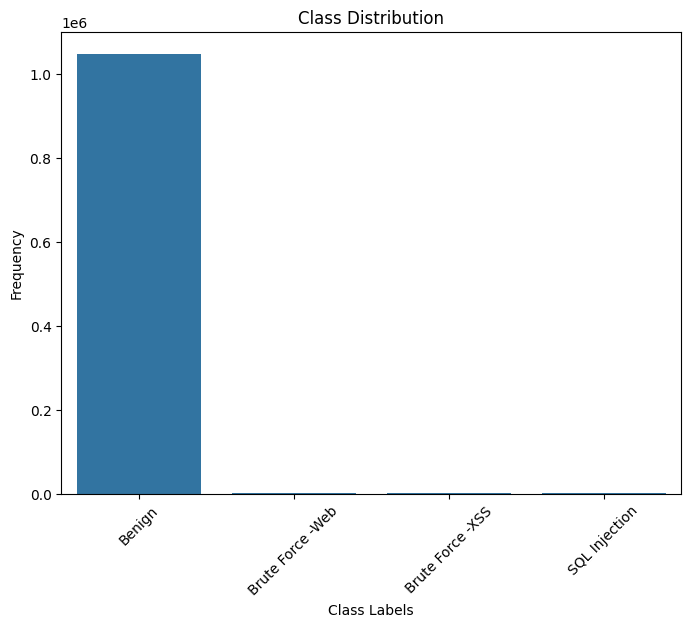

In [159]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_friday_2)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [160]:
df_friday_3 = pd.read_csv('/content/drive/MyDrive/Birkbeck Materials/CICIDS2018/03-02-2018.csv')

In [161]:
df_friday_3.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [162]:
df_friday_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [163]:
df_friday_3.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [165]:
df_friday_3["Label"].unique()

array(['Benign', 'Bot'], dtype=object)

In [166]:
df_friday_3.shape

(1048575, 80)

In [167]:
benign_fri_3 = df_friday_3["Label"].value_counts()[['Benign']].sum()
print(benign_fri_3)

762384


In [171]:
bot_fri_3 = df_friday_3["Label"].value_counts()[['Bot']].sum()
print(bot_fri_3)

286191


In [172]:
benign_to_bot_ratio = benign_fri_3/bot_fri_3
print(benign_to_bot_ratio)

2.6638992840445717


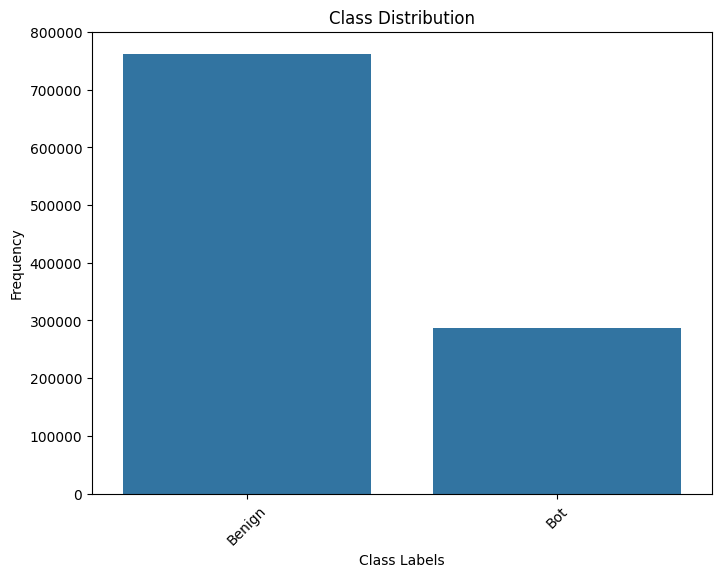

In [173]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_friday_3)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()